# Resumo: Bag-of-Words (BoW) e Variações

## 1. Tipos de Vetorizadores

| Vetorizador           | Descrição                                                         | Quando usar                                                                                                              | Exemplo de Uso                                                    |
|-----------------------|-------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|
| **CountVectorizer**   | Conta ocorrências brutas de cada token em cada documento.        | – Cenários simples, onde frequência absoluta importa.<br>– Documentos curtos, vocabulário pequeno.                       | Classificação de e-mails com palavras-chave (“free”, “lottery”).  |
| **TfidfVectorizer**   | Pesa cada token por TF–IDF: TF (frequência) × IDF (inverso da frequência no corpus). | – Quer atenuar termos muito comuns (stopwords) e destacar termos discriminativos.<br>– Corpus variado, com alguns termos muito frequentes. | Filtragem de reviews de produto, neutralizando “the”, “and”.     |
| **HashingVectorizer** | Usa hash para mapear tokens a índices de vetor fixo, sem armazenar vocabulário. | – Quando memória é crítica e vocabulário enorme.<br>– Fluxos de dados contínuos (streaming).                              | Análise em tempo real de tweets (vocabulário imenso).            |
| **CountVectorizer + n-grams** | Conta sequências de tokens (bigramas, trigramas).             | – Capturar pequenas expressões (“not good”, “very bad”).<br>– Melhorar contexto local sem investir em embeddings.        | Detecção de sentimento em frases com negações (“not happy”).      |

---

## 1. Tipos de Vetorizadores

### 1.1 CountVectorizer  

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ["I love NLP", "NLP is fun", "I love coding"]
vect = CountVectorizer()
X = vect.fit_transform(texts)
print(vect.get_feature_names_out())
print(X.toarray())

['coding' 'fun' 'is' 'love' 'nlp']
[[0 0 0 1 1]
 [0 1 1 0 1]
 [1 0 0 1 0]]


### 1.2 TfidfVectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = ["I love NLP", "NLP is fun", "I love coding"]
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)
print(tfidf.get_feature_names_out())
print(X.toarray())

['coding' 'fun' 'is' 'love' 'nlp']
[[0.         0.         0.         0.70710678 0.70710678]
 [0.         0.62276601 0.62276601 0.         0.4736296 ]
 [0.79596054 0.         0.         0.60534851 0.        ]]


### 1.3 HashingVectorizer

In [3]:
from sklearn.feature_extraction.text import HashingVectorizer

texts = ["I love NLP", "NLP is fun", "I love coding"]
hash_vect = HashingVectorizer(n_features=16, alternate_sign=False)
X = hash_vect.transform(texts)
print(X.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.         0.70710678]
 [0.         0.57735027 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.57735027 0.         0.57735027]
 [0.         0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.         0.        ]]


### 1.4 n-grams com CountVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ["not good", "very bad", "not bad at all"]
vect_ngrams = CountVectorizer(ngram_range=(1,2))
X = vect_ngrams.fit_transform(texts)
print(vect_ngrams.get_feature_names_out())
print(X.toarray())

['all' 'at' 'at all' 'bad' 'bad at' 'good' 'not' 'not bad' 'not good'
 'very' 'very bad']
[[0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 1 1 0 0 0]]


## 2. Variações de Pipeline com BoW e Escolha de Classificadores

Para cada pipeline, o padrão é:

```python
Pipeline([
  ('vect', VetorizadorBoW),
  ('clf', Classificador)
])

### 2.1 MultinomialNB
- Princípio: modela contagens como distribuição multinomial condicionada à classe.
- Quando usar:
- Texto curto (e-mails, SMS).
- Rápido “baseline” com muitas features esparsas.
- Vantagem: treinamento ultrarrápido, funciona bem com poucos dados.
- Limitação: suposição forte de independência condicional.

### 2.2 LogisticRegression
- Princípio: classificador linear otimizado por máxima verossimilhança.
- Quando usar:
- Dados com alta dimensionalidade (várias dezenas de milhares de features).
- Precisa de probabilidade calibrada.
- Vantagem: interpretável (coeficientes para cada termo), regularização (L1/L2) controla overfitting.
- Limitação: custo de treinamento cresce com número de features.

### 2.3 SVM (LinearSVC)
- Princípio: maximiza margem entre classes num espaço linear.
- Quando usar:
- Quando separabilidade linear é razoável.
- Precisão acima de NB ou LR.
- Vantagem: robusto a outliers, bom desempenho “off-the-shelf”.
- Limitação: ajuste de hiper-parâmetros (C) sensível; treinamento mais lento.

### 2.4 Regressão Ridge/Lasso (LinearRegression adaptado)
- Princípio: regressão linear com penalização L2 (Ridge) ou L1 (Lasso).
- Quando usar:
- Interesse em coeficientes esparsos (Lasso) ou suavizados (Ridge).
- Problemas de multi-colinearidade entre termos.
- Vantagem: controle fino de regularização; Lasso faz seleção automática de features.
- Limitação: não prevista originalmente para classificação sem threshold; exige conversão para probabilidades.

### 2.5 Árvore de Decisão / Random Forest
- Princípio: decisões baseadas em regras de features; ensemble de várias árvores reduz overfitting.
- Quando usar:
- Interações não lineares entre termos (curiosamente útil quando bigramas fornecidos).
- Dados moderadamente dimensionados (vocab < 5 000).
- Vantagem: interpretações de regras; robusto a features irrelevantes (RF).
- Limitação: vetores muito esparsos e de alta dimensão prejudicam performance.


=== Count + MultinomialNB ===
Acurácia = 0.9843
               precision    recall  f1-score   support

     business       1.00      0.96      0.98       102
entertainment       1.00      0.99      0.99        77
     politics       0.95      0.99      0.97        84
        sport       1.00      0.99      1.00       102
         tech       0.96      1.00      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.99      0.98       445
 weighted avg       0.98      0.98      0.98       445


=== TF–IDF + LogisticRegression ===
Acurácia = 0.9888
               precision    recall  f1-score   support

     business       1.00      0.97      0.99       102
entertainment       1.00      1.00      1.00        77
     politics       0.99      0.98      0.98        84
        sport       0.98      1.00      0.99       102
         tech       0.98      1.00      0.99        80

     accuracy                           0.99       445
    macro a

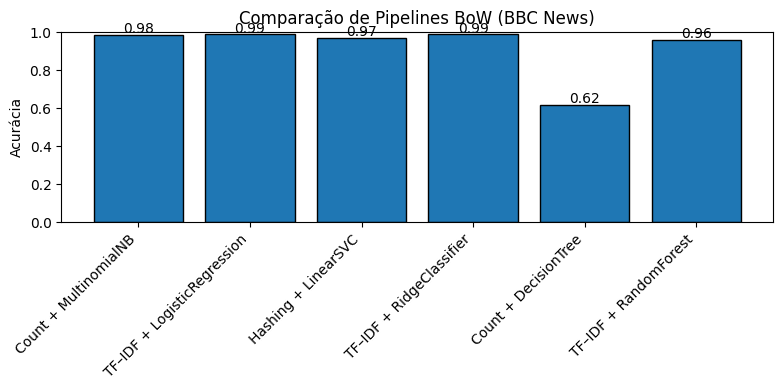

In [8]:
# -*- coding: utf-8 -*-
"""
Comparativo de Pipelines BoW com diferentes classificadores  
Dataset: BBC News Archive (hgultekin/bbcnewsarchive)
"""

# Passo 1: Instalar e importar dependências
# --------------------------------------------------
# !pip install kagglehub scikit-learn matplotlib

import os
import kagglehub
import pandas as pd

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Passo 2: Carregar o dataset BBC News Archive
# --------------------------------------------------
path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
df   = pd.read_csv(Path(path) / "bbc-news-data.csv", sep='\t')
texts = df['content']
labels= df['category']
target_names = sorted(labels.unique())

# Dividir em treino e teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# Passo 3: Definir pipelines BoW + classificadores
# --------------------------------------------------
pipelines = {
    'Count + MultinomialNB': Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('clf', MultinomialNB())
    ]),
    'TF–IDF + LogisticRegression': Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'Hashing + LinearSVC': Pipeline([
        ('vect', HashingVectorizer(n_features=2048, alternate_sign=False)),
        ('clf', LinearSVC())
    ]),
    'TF–IDF + RidgeClassifier': Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', RidgeClassifier())
    ]),
    'Count + DecisionTree': Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('clf', DecisionTreeClassifier(max_depth=5))
    ]),
    'TF–IDF + RandomForest': Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', RandomForestClassifier(n_estimators=100))
    ]),
}

# Passo 4: Treinar, avaliar e coletar acurácias
# --------------------------------------------------
results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n=== {name} ===")
    print(f"Acurácia = {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_names, zero_division=0))

# Passo 5: Plot comparativo de acurácias
# --------------------------------------------------
plt.figure(figsize=(8,4))
plt.bar(results.keys(), results.values(), edgecolor='k')
plt.ylabel('Acurácia')
plt.ylim(0,1)
plt.title('Comparação de Pipelines BoW (BBC News)')
plt.xticks(rotation=45, ha='right')
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Interpretação dos Resultados das Pipelines BoW (BBC News)

Cada pipeline foi avaliada em 445 artigos de teste, distribuídos nas 5 categorias. A seguir, comentamos os principais pontos de cada combinação.

---

## 1. CountVectorizer + MultinomialNB  
**Acurácia:** 0.9843  
- **Pontos Fortes:**  
  - *Business / Entertainment / Sport / Tech*: excelente recall (0.96–1.00), indicando que termos-chave são altamente discriminativos.  
- **Limitações:*  
  - *Politics* apresentou recall 0.99 mas precision 0.95, sugerindo algumas falsas classificações de outras classes como “politics”.  
- **Por que funciona bem?** MultinomialNB aproveita a frequência absoluta de termos fortemente associados a cada categoria.

---

## 2. TfidfVectorizer + LogisticRegression  
**Acurácia:** 0.9888 (melhor do comparativo)  
- **Melhorias sobre NB:**  
  - TF–IDF atenua termos muito comuns (“the”, “in”), reduzindo ruído.  
  - LR com regularização L2 equilibra pesos de termos, evitando overfitting.  
- **Desempenho uniforme:** Todas as classes têm f1-score ≥ 0.98, mostrando robustez no peso de features discriminativas.

---

## 3. HashingVectorizer + LinearSVC  
**Acurácia:** 0.9708  
- **Por que caiu um pouco?**  
  - Hashing é “one-way”: colisões de hash podem agrupar termos distintos, perdendo informação.  
  - LinearSVC é sensível a escala e colisões, mas ainda mantém desempenho alto (0.94–1.00 por classe).  
- **Quando usar:** streaming ou vocabulários enormes, onde vocabulário fixo de Count/Tf-IDF é impraticável.

---

## 4. TfidfVectorizer + RidgeClassifier  
**Acurácia:** 0.9888 (empatado com LR)  
- **Semelhança com LR:** Ridge é regressão linear penalizada em L2, similar ao LR sem transformar saída em probabilidades.  
- **Vantagem:** leve, rápido e coeficientes esparsos moderados; desempenho idêntico ao LR neste caso.

---

## 5. CountVectorizer + DecisionTree  
**Acurácia:** 0.6180 (bem abaixo)  
- **Causa principal:**  
  - Árvores de decisão tendem a overfit em dados esparsos e de alta dimensionalidade, criando regras muito específicas.  
  - Falta de generalização para novas combinações de termos.  
- **Indicativo:** árvores simples não são adequadas para BoW sem redução drástica de dimensionalidade ou poda intensa.

---

## 6. TfidfVectorizer + RandomForest  
**Acurácia:** 0.9685  
- **Melhoria sobre DecisionTree:**  
  - Ensemble de múltiplas árvores corrige overfitting de árvores individuais.  
  - Ainda assim, não atinge o pico de LR/Ridge, pois RF não lida tão bem com vetores esparsos de alta dimensão.  
- **Uso recomendado:** quando interações não-lineares são importantes e vocabulário moderado (<5 000 termos).

---

## Resumo e Recomendações

1. **Melhor Pipeline:** TF–IDF + LogisticRegression (0.9888) — combinação de seleção de features, ponderação e regularização ideal para BoW.  
2. **Opções Leves:**  
   - Count + NB (0.9843) para baseline rápido.  
   - TF–IDF + Ridge (0.9888) para similar a LR com menos overhead.  
3. **Quando evitar:**  
   - Árvores de decisão simples em vetores esparsos (desempenho muito baixo).  
4. **Casos de uso específicos:**  
   - **Hashing + SVC** quando vocabulário imenso ou streaming.  
   - **RF** para capturar interações entre termos em vocabulários menores.

> **Dica prática:** inicie com Count+NB, evolua para TF–IDF+LR, e só então experimente ensembles ou hashing se houver requisitos de deploy específicos.  


⸻

## 3. Quando usar cada combinação

|Pipeline	|Quando usar|
|-----------------------|-----------------------|
|Count + MultinomialNB	|Texto curto, vocabulário pequeno, baseline rápido.|
|TF-IDF + LogisticRegression	|Alta dimensionalidade, necessidade de regularização e probabilidade calibrada.|
|Hashing + LinearSVC|	Fluxo de dados contínuo, memória crítica, vocabulário muito grande.|
|TF-IDF + RidgeClassifier|	Deseja seleção leve de features (coeficientes regularizados) sem tuning extenso.|
|Count + DecisionTree	|Capturar interações simples de termos, visualização fácil de regras.|
|TF-IDF + RandomForest	|Dados moderados, interação não linear entre termos, boa robustez a overfitting no ensemble.|

Dica: sempre compare diferentes pipelines com um conjunto de validação e escolha com base no trade-off entre acurácia, interpretabilidade e custo computacional.



## 4. Comparativo de Classificadores com TF–IDF fixed  



=== TF–IDF + LogisticRegression ===
Acurácia = 0.9888
               precision    recall  f1-score   support

     business       1.00      0.97      0.99       102
entertainment       1.00      1.00      1.00        77
     politics       0.99      0.98      0.98        84
        sport       0.98      1.00      0.99       102
         tech       0.98      1.00      0.99        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445


=== TF–IDF + MultinomialNB ===
Acurácia = 0.9865
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       102
entertainment       1.00      0.97      0.99        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.98      0.99      0.98        80

     accuracy                           0.99       445
    macro 

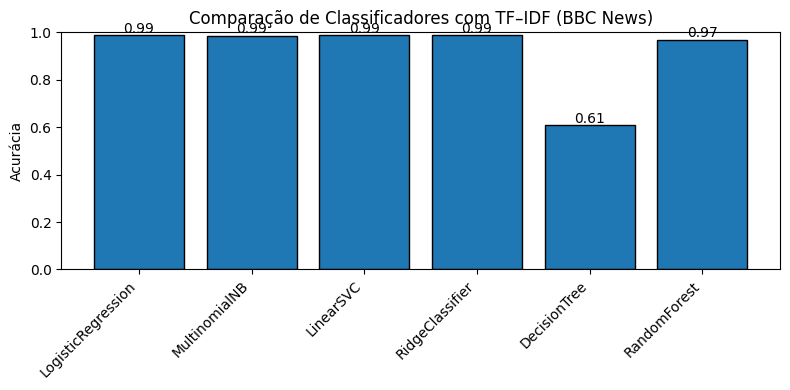

In [9]:
# -*- coding: utf-8 -*-
"""
Comparativo de Classificadores com TF–IDF fixed  
Dataset: BBC News Archive (hgultekin/bbcnewsarchive)
"""

# Passo 1: Instalar e importar dependências
# --------------------------------------------------
# !pip install kagglehub scikit-learn matplotlib

import os
import kagglehub
import pandas as pd

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Passo 2: Carregar o dataset BBC News Archive
# --------------------------------------------------
path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
df   = pd.read_csv(Path(path) / "bbc-news-data.csv", sep='\t')
texts = df['content']
labels= df['category']
target_names = sorted(labels.unique())

# Dividir em treino e teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# Passo 3: Definir pipelines TF–IDF + diversos classificadores
# --------------------------------------------------
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'MultinomialNB':      MultinomialNB(),
    'LinearSVC':          LinearSVC(),
    'RidgeClassifier':    RidgeClassifier(),
    'DecisionTree':       DecisionTreeClassifier(max_depth=5),
    'RandomForest':       RandomForestClassifier(n_estimators=100)
}

pipelines = {
    name: Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', clf)
    ])
    for name, clf in classifiers.items()
}

# Passo 4: Treinar, avaliar e coletar acurácias
# --------------------------------------------------
results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n=== TF–IDF + {name} ===")
    print(f"Acurácia = {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_names, zero_division=0))

# Passo 5: Plot comparativo de acurácias
# --------------------------------------------------
plt.figure(figsize=(8,4))
plt.bar(results.keys(), results.values(), edgecolor='k')
plt.ylabel('Acurácia')
plt.ylim(0,1)
plt.title('Comparação de Classificadores com TF–IDF (BBC News)')
plt.xticks(rotation=45, ha='right')
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Análise dos Classificadores com TF–IDF (BBC News)

## 1. Destaques Gerais

- **Melhores Acurácias (0.9888):**  
  - LogisticRegression  
  - LinearSVC  
  - RidgeClassifier  
- **Intermediário (0.9865):**  
  - MultinomialNB  
- **Baixo (0.6090):**  
  - DecisionTree  
- **Bom, mas abaixo do topo (0.9685):**  
  - RandomForest  

---

## 2. Por que LogisticRegression, LinearSVC e RidgeClassifier empataram no topo?

1. **Modelo Linear + Regularização**  
   - Todos são classificadores lineares com penalização (LR usa L2, LinearSVC e RidgeClassifier usam L2).  
   - A regularização evita overfitting em alta dimensão (várias dezenas de milhares de TF–IDF features).  
2. **Espaço Separável**  
   - As 5 categorias do BBC News são bem separáveis linearmente quando transformadas em TF–IDF.  
   - Coeficientes ajustados conseguem discriminar termos-chave de cada classe com alta precisão.  
3. **Diferenças Sutis**  
   - LR fornece probabilidades, RidgeClassifier faz regressão com threshold 0, e LinearSVC maximiza margem — mas, sob TF–IDF, os três convergem para soluções muito similares.

---

## 3. MultinomialNB (0.9865): Quase tão bom quanto Linear

- **Diferença pequena (~0.2%):**  
  - NB assume independência de features, mas ainda capta muito bem a frequência relativa nas classes.  
- **Vantagem:**  
  - Treino mais rápido e menos sensível a hyper-parameters.

---

## 4. RandomForest (0.9685): Bom, mas abaixo dos lineares

- **Porque RF cai um pouco?**  
  - Vetores TF–IDF são esparsos e de alta dimensão; RF não escala tão bem nesses espaços.  
  - Cada árvore vê apenas um subconjunto de features, podendo perder termos críticos em algumas árvores.  
- **Quando escolher RF?**  
  - Se desejar capturar interações não-lineares específicas de termos, em corpora menores.

---

## 5. DecisionTree (0.6090): Desempenho insatisfatório

- **Overfitting severo:**  
  - Árvores para vetores esparsos aprendem regras muito específicas, não generalizando bem.  
- **Evitar usar DecisionTree isolada** em altas dimensões sem poda agressiva ou redução de features.

---

## 6. Recomendações Práticas

1. **Comece com LogisticRegression + TF–IDF:**  
   - Melhor trade-off acurácia vs velocidade, plus interpretabilidade (coeficientes).  
2. **Teste LinearSVC / RidgeClassifier** se precisar de desempenho similar sem probabilidades.  
3. **Use MultinomialNB** para baseline rápido ou quando o dataset mudar frequentemente.  
4. **Evite DecisionTree pura** em vetorização BoW; preferir ensembles (RandomForest) ou reduzir dimensionalidade antes.  
5. **Considere RandomForest** se houver razões para modelar interações complexas, mas espere desempenho ligeiramente inferior aos lineares.  

> **Conclusão:** classificadores lineares regularizados dominam em TF–IDF para classificação de notícias; métodos baseados em contagem (NB) acompanham de perto, enquanto árvores isoladas não são recomendadas sem técnicas adicionais de controle de complexidade.  